In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [13]:
# Hyperparameters
lambd = 0.1
T = 500000 # max_epochs

In [14]:
def train(X, y):
    max_fval = np.max(X) # Maximum feature value
    eta = 0.001 * max_fval # Initial learning rate
    w = np.zeros(X.shape[1]) # Weight vector

    # For each epoch
    for t in range(1, T+1):
        # Get a random index from features
        i = np.random.choice(X_train.shape[0])
        # Get the corresponding random feature and label
        X_i, y_i = X[i], y[i]

        # Compute hinge loss
        v = 1 - (y_i * np.dot(X_i, w))

        # Compute the partial gradient
        if v <= 0:
            dw = lambd * w
        else:
            dw = lambd * w - y_i * X_i

        # Update the weight vector
        w = w - eta * dw
        
        # Reduce the learning rate but don't reduce it too much
        eta = eta / 10 if eta > 0.00001 else eta
        
        if t % (T/10) == 0:
            print('#Epoch: {}/{}'.format(t, T))

    # Return the weight vector of the final epoch
    return w

In [15]:
def decision_function(w, X):
    # Add one to the X values to incorporate bias
    if len(w) == len(X[0]) + 1:
        X = np.c_[np.ones((X.shape[0])), X]
    # Compute the output of the svm weight vector
    return np.dot(X, w)

In [25]:
def draw(w, X, y):
    # Plot the features
    plt.scatter(X[:, 1], X[:, 2], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = decision_function(w, xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(X[[25, 67], 1], X[[25, 67], 2], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [17]:
def test(w, X, y):
    # Compute the number of misclassified points
    error = np.sum(np.where(y != np.sign(decision_function(w, X)), 1, 0))
    print('Total number of test data points: {}'.format(len(X)))
    print('Number of misclassified points: {}'.format(error))

In [18]:
# Generate sample data
features, labels = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=10)

# Add one to the feature values to incorporate bias
features = np.c_[np.ones((features.shape[0])), features]
# Change labels from (0,1) -> (-1,1)
labels = np.where(labels == 1, 1, -1)

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = features[:80], features[-20:], labels[:80], labels[-20:]

In [20]:
weights = train(X_train, y_train)

#Epoch: 50000/500000
#Epoch: 100000/500000
#Epoch: 150000/500000
#Epoch: 200000/500000
#Epoch: 250000/500000
#Epoch: 300000/500000
#Epoch: 350000/500000
#Epoch: 400000/500000
#Epoch: 450000/500000
#Epoch: 500000/500000


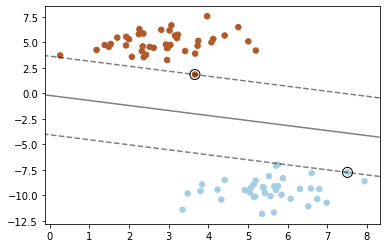

In [26]:
draw(weights, X_train, y_train)

In [22]:
test(weights, X_test, y_test)

Total number of test data points: 20
Number of misclassified points: 0


In [72]:
max_epochs = 500000
lambd = 0.01
max_fval = np.max(X_train)
eta = 0.001 * max_fval
w = np.zeros(X_train.shape[1])

for epoch in range(max_epochs):
    index = np.random.choice(X_train.shape[0])
    X_i, y_i = X_train[index], y_train[index]

    l = 1 - (y_i * np.dot(X_i, w))

    if l <= 0:
        dw = lambd * w
    else:
        dw = lambd * w - y_i * X_i

    w = w - eta * dw
    if eta > 0.00001:
        eta = eta / 10

In [73]:
w

array([0.04983491, 0.11819474, 0.28002708])

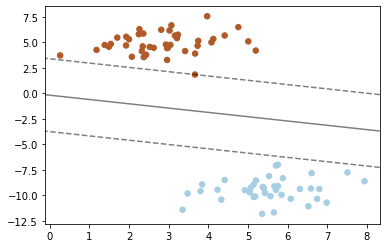

In [74]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm

# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# clf = svm.SVC(kernel='linear', C=1000)
# clf.fit(X, y)

plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plt.plot(xlim, slope * xlim + intercept, '-k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = decision_function(w, xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(X_train[[25, 67], 1], X_train[[25, 67], 2], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
m = X_train.shape[0]
w = np.zeros(X_train.shape[1])

loss = np.maximum(0, 1 - y_train * np.dot(X_train, w))
hinge_loss = np.sum(loss) / m

cost = lambd / 2 * np.dot(w, w) + hinge_loss

In [29]:
max_epochs = 50000
C = 1000
# eta = 0.000001
eta = 0.000001
w = np.zeros(X_train.shape[1])

for epoch in range(max_epochs):M
    w = w - eta * dw
#     if eta > 0.000001:
#         eta = eta / 10

In [128]:
w

array([0.05153579, 0.12789867, 0.26025647])

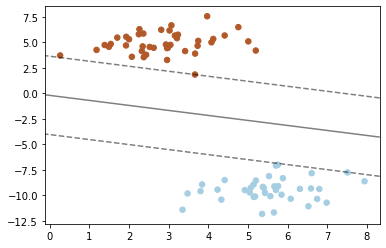

In [129]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm

# X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# clf = svm.SVC(kernel='linear', C=1000)
# clf.fit(X, y)

plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plt.plot(xlim, slope * xlim + intercept, '-k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = decision_function(w, xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(X_train[[25, 67], 1], X_train[[25, 67], 2], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [608]:
eta

7.940851713463681e-07

In [576]:
w

array([0.05220855, 0.12735167, 0.26778337])

In [770]:
max_epochs = 10000
lambd = 0.0001
eta = max_fval
theta = [np.zeros(X_train.shape[1])]
w = []

for epoch in range(max_epochs):
    w.append(np.divide(theta[-1], lambd * (epoch+1)))
    index = np.random.choice(X_train.shape[0])
    X_i, y_i = X_train[index], y_train[index]

    if (y_i * np.dot(X_i, w[-1])) < 1:
        theta.append(theta[-1] + eta*(y_i * X_i))
    else:
        theta.append(theta[-1])

    eta /= 10

/home/rmodi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  
/home/rmodi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [771]:
w = w[-1]

In [772]:
w

array([-inf, -inf,  inf])

In [480]:
slope = -(w[2]/w[1])/(w[2]/w[0])  
intercept = -w[2]/w[1]

In [15]:
slope = -(w[0]/w[2])/(w[0]/w[1])  
intercept = -w[0]/w[2]

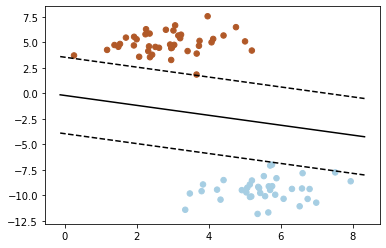

In [16]:
# fit the model, don't regularize for illustration purposes
from sklearn import svm

plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
xfit = np.linspace(xlim[0], xlim[1], 100)

plt.plot(xfit, slope * xfit + intercept, '-k')
plt.plot(xfit, slope * xfit + intercept+3.75, '--k')
plt.plot(xfit, slope * xfit + intercept-3.75, '--k')

plt.show()

In [815]:
s1 = set([x[0] for x in np.argwhere(X_train[:,2] < 2.5)])

In [816]:
s2 = set([x[0] for x in np.argwhere(X_train[:,2] > 0)])

In [817]:
s1.intersection(s2)

{67}

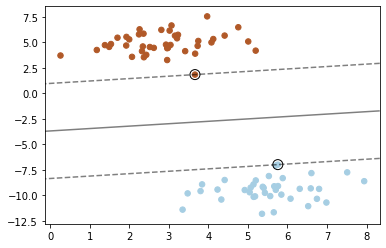

In [517]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=10)
X, y = X[:80], y[:80]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

In [18]:
def decision_function(weights, features):
    if features.shape[1] == len(weights) - 1:
        features = np.c_[np.ones((features.shape[0])), features]
    assert len(weights) == len(features[0])
    return np.dot(features, weights)

In [19]:
def predict(weights, features):
    if features.shape[1] == len(weights) - 1:
        features = np.c_[np.ones((features.shape[0])), features]
    assert len(weights) == len(features[0])
    return np.sign(np.dot(features, weights))

In [20]:
np.sum(np.where(predict(w, X_test) != y_test, 1, 0)) / len(y_test)

0.0

In [ ]:
y_test

In [324]:
clf.dual_coef_

array([[-0.02422568,  0.02422568]])